# 10 Step Phase Shifting Technique

In [5]:
%load_ext autoreload

In [6]:
%autoreload 2

In [7]:
import os

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

from functions import load_raw_img, rad_to_deg, mask_to_dummy
from unwrapping_algorithm import phase_unwrap

### Load the 10 images

In [8]:
base_path = "img/disc/phase-shifting/"
file_type = ".CR2"

file_names = os.listdir(base_path)

imgs = []

for file_name in file_names:
    imgs.append(load_raw_img(base_path + file_name)[:,:,1] / 10)

In [9]:
alphas = rad_to_deg(np.array([
    np.pi / 2, 
    5*np.pi/8, 
    3*np.pi/4, 
    7*np.pi/8, 
    np.pi/2, 
    np.pi/2, 
    np.pi/2, 
    np.pi/2, 
    np.pi/2, 
    np.pi/2
]))

betas = rad_to_deg(np.array([
    0,
    np.pi/8,
    np.pi/4,
    3*np.pi/8,
    np.pi/2,
    0,
    0,
    np.pi/4,
    0,
    np.pi/2
]))

for i in range(len(alphas)):
    print(f'Alpha: {alphas[i]}, Beta: {betas[i]}')

Alpha: 90.0, Beta: 0.0
Alpha: 112.5, Beta: 22.5
Alpha: 135.0, Beta: 45.0
Alpha: 157.5, Beta: 67.5
Alpha: 90.0, Beta: 90.0
Alpha: 90.0, Beta: 0.0
Alpha: 90.0, Beta: 0.0
Alpha: 90.0, Beta: 45.0
Alpha: 90.0, Beta: 0.0
Alpha: 90.0, Beta: 90.0


### Calculate the isoclinic parameter
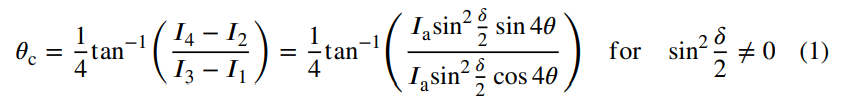

In [10]:
def generate_isoclinic_param(
        img_1: np.ndarray, 
        img_2: np.ndarray, 
        img_3: np.ndarray, 
        img_4: np.ndarray
) -> np.ndarray:
    """
    Images should be in order defined by Ramesh et al. 
    Returns the isoclinic parameter
    """
    return 1/4 * np.arctan2((img_4 - img_2),(img_3 - img_1))

In [11]:
isoclinic_param = generate_isoclinic_param(imgs[0], imgs[1], imgs[2], imgs[3])

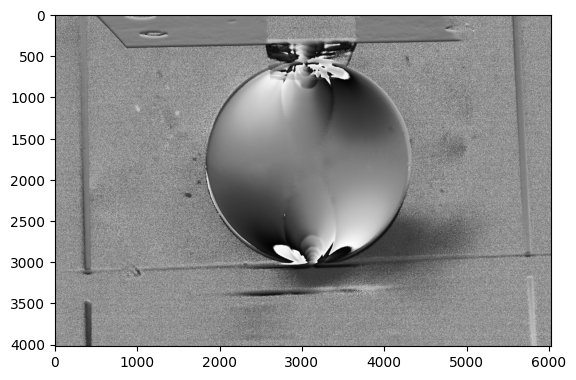

In [21]:
plt.imshow(isoclinic_param, cmap='gray')
plt.imsave('img/disc/results/disc_isocl_wr.jpg', isoclinic_param, cmap='gray')   

### Generate isochromatic parameter
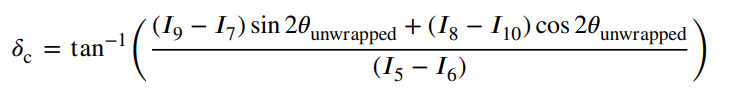


In [13]:
def generate_isochromatic_param(
    img_5: np.ndarray,
    img_6: np.ndarray,
    img_7: np.ndarray,
    img_8: np.ndarray,
    img_9: np.ndarray,
    img_10: np.ndarray,
    isoclinic_param: np.ndarray
) -> np.ndarray:
    return np.arctan(((img_9 - img_7)*np.sin(2*isoclinic_param) + 
                      (img_8 - img_10)*np.cos(2*isoclinic_param))/(img_5 - img_6))

In [14]:
isochromatic_param_rad = np.nan_to_num(generate_isochromatic_param(
    imgs[4],
    imgs[5],
    imgs[6],
    imgs[7],
    imgs[8],
    imgs[9],
    isoclinic_param
))

C:\Users\zebsu\AppData\Local\Temp\ipykernel_23912\3016659149.py:10: RuntimeWarning: divide by zero encountered in divide
  return np.arctan(((img_9 - img_7)*np.sin(2*isoclinic_param) +
C:\Users\zebsu\AppData\Local\Temp\ipykernel_23912\3016659149.py:10: RuntimeWarning: invalid value encountered in divide
  return np.arctan(((img_9 - img_7)*np.sin(2*isoclinic_param) +


Translate `isochromatic_param` values from `(-pi/2, pi/2)` to `(0, 255)`

In [15]:
isochromatic_param = (isochromatic_param_rad + np.pi/2)*255/(np.pi)

## Isochromatic Image Processing

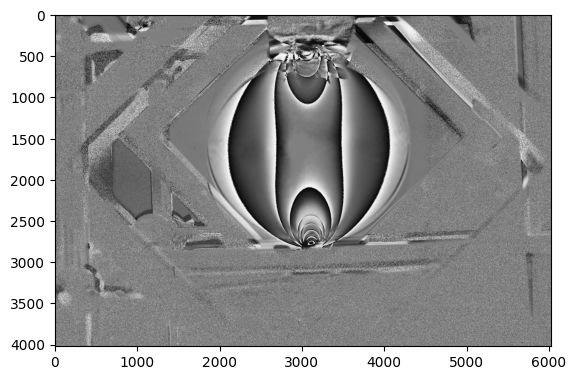

In [16]:
plt.imshow(isochromatic_param, cmap='gray')
plt.imsave('img/disc/results/disc_isochr_wr.jpg', isochromatic_param, cmap='gray')

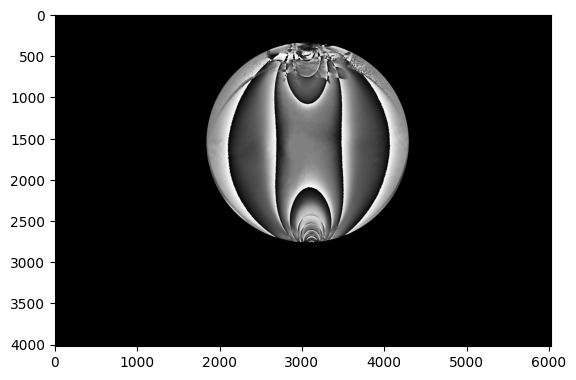

In [17]:
mask = cv.imread('img/disc/mask/disc_mask_phase_shifting.jpg', cv.IMREAD_GRAYSCALE)

isochromatic_masked = cv.multiply(isochromatic_param, mask / 255)
isochromatic_masked = cv.medianBlur(isochromatic_masked.astype(np.uint8), 5)

plt.imshow(isochromatic_masked, cmap='gray')

Generate dummy

In [18]:
# Set stack as isotropic points
stack = [(1600, 2000), (1600, 4200)]
#create dummy array to be populated by unwrapped pixels
dummy = mask_to_dummy(mask)

# Unwrap
img_unwrapped = phase_unwrap(isochromatic_masked, stack, dummy)

185 169
0 2
300000 1637
600000 2054
900000 2333
1200000 2607
1500000 2865
1800000 3088
2100000 3289
2400000 3400
2700000 3207
3000000 2993
3300000 2752
3600000 2470
3900000 2123
4200000 1683
4500000 986


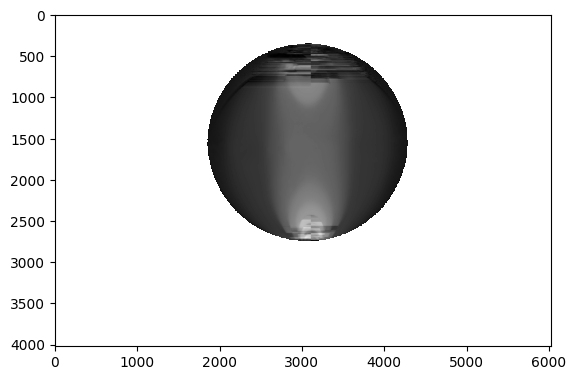

In [20]:
plt.imshow(img_unwrapped, cmap='gray')
plt.imsave('img/disc/results/disc_isochr_unwr_mask.jpg', np.nan_to_num(img_unwrapped), cmap='gray')